In [ ]:
# common
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# fine tuning
from sklearn.model_selection import GridSearchCV

import joblib

# warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #utilisé pour manipuler et analyser des données tabulaires en Python.
from google.colab import files #permet de télécharger et charger des fichiers depuis l'environnement Google Colab.
import io #offre des fonctionnalités d'entrée/sortie pour gérer les flux de données.
import seaborn as sns #est utilisé pour créer des visualisations statistiques attrayantes.
import matplotlib.pyplot as plt #permet de créer des graphiques et des visualisations personnalisées dans Python.
import numpy as np

In [ ]:
uploaded = files.upload()

Saving Automobile_Tn_F-1.csv to Automobile_Tn_F-1 (4).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Automobile_Tn_F-1 (4).csv']))

In [ ]:
df=data.copy()
df.head()

,Car Brand,Car Model,prix DT,year,Kms,Energie,gear
0,Ssangyong,Tivoli,80000,2020,17000,Essence,Automatique
1,Ssangyong,Rexton,100000,2014,42000,Diesel,Automatique
2,Mercedes-Benz,Classe C,120000,2014,150000,Diesel,Automatique
3,Seat,Tarraco,121600,2021,96000,Essence,Automatique
4,Mercedes-Benz,Classe E,249600,2021,34000,Essence,Automatique


In [ ]:
df.tail()

,Car Brand,Car Model,prix DT,year,Kms,Energie,gear
1647,Peugeot,208,34700,2019,118000,Essence,Manuelle
1648,Toyota,C-HR,75000,2020,70000,Essence,Manuelle
1649,Peugeot,301,21000,2014,275000,Essence,Manuelle
1650,Seat,Ibiza,72000,2020,55000,Essence,Manuelle
1651,Hyundai,Grand i10,50000,2021,17900,Essence,Manuelle


In [ ]:
df.shape

(1652, 7)

In [ ]:
df.dtypes


Car Brand    object
Car Model    object
prix DT       int64
year          int64
Kms           int64
Energie      object
gear         object
dtype: object

In [ ]:
df.isna().sum()

Car Brand    0
Car Model    0
prix DT      0
year         0
Kms          0
Energie      0
gear         0
dtype: int64

In [ ]:
df['Car Brand'].value_counts()

Mercedes-Benz    211
Volkswagen       169
BMW              154
Peugeot          102
KIA              100
Audi              78
Renault           61
Ford              59
Nissan            58
Citroën           56
Seat              53
Hyundai           50
Land Rover        46
Fiat              39
MG                38
Mazda             35
Porsche           34
Toyota            33
Haval             29
Suzuki            21
Jeep              20
Ssangyong         18
Chery             15
Skoda             13
Dacia             13
Jaguar            13
Mini              13
Mahindra          13
Honda             12
Mitsubishi        11
Opel              10
DS                10
Dongfeng           9
Chevrolet          9
Cupra              7
Alfa               6
Geely              5
DFSK               4
Smart              3
Great              3
BAIC               3
Infiniti           3
Isuzu              3
Lada               2
Foton              2
Volvo              2
ZXAUTO             1
Wallyscar    

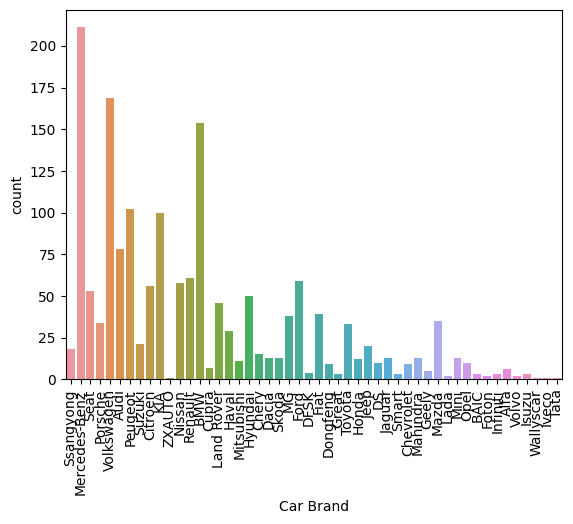

In [ ]:
ax = sns.countplot(data=df, x=df['Car Brand'])
ax.tick_params(axis='x', rotation=90)

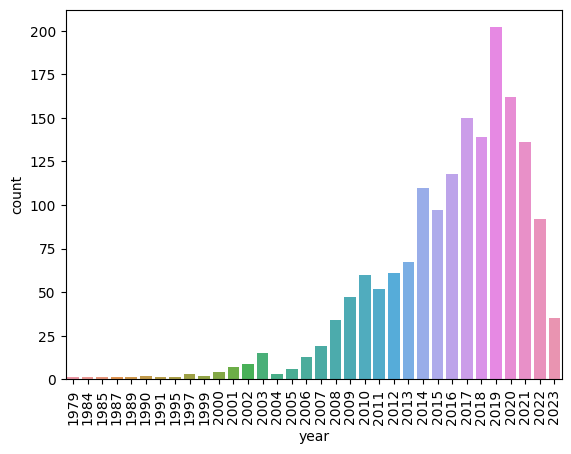

In [ ]:
ax = sns.countplot(data=df, x=df['year'])
ax.tick_params(axis='x', rotation=90)

In [ ]:
df['Energie'].value_counts()

Essence                 1290
Diesel                   332
Hybride (essence)         21
Hybride (diesel)           8
Hybride rechargeable       1
Name: Energie, dtype: int64

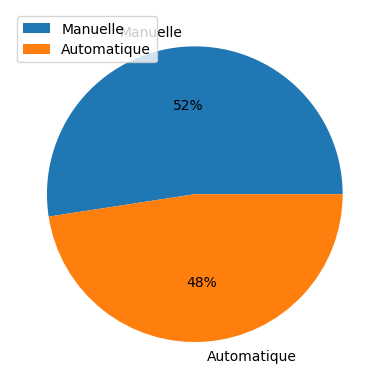

In [ ]:
labels = ['Manuelle', 'Automatique']
plt.pie(df['gear'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

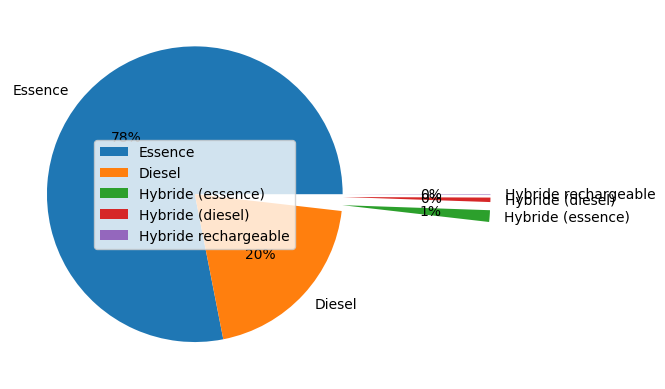

In [ ]:
# distribution of cars by fuel type
labels = ['Essence', 'Diesel', 'Hybride (essence)', 'Hybride (diesel)', 'Hybride rechargeable']
plt.pie(df['Energie'].value_counts(), labels = labels, explode=[0, 0, 1, 1, 1], autopct='%.0f%%')
plt.legend()
plt.show()

<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

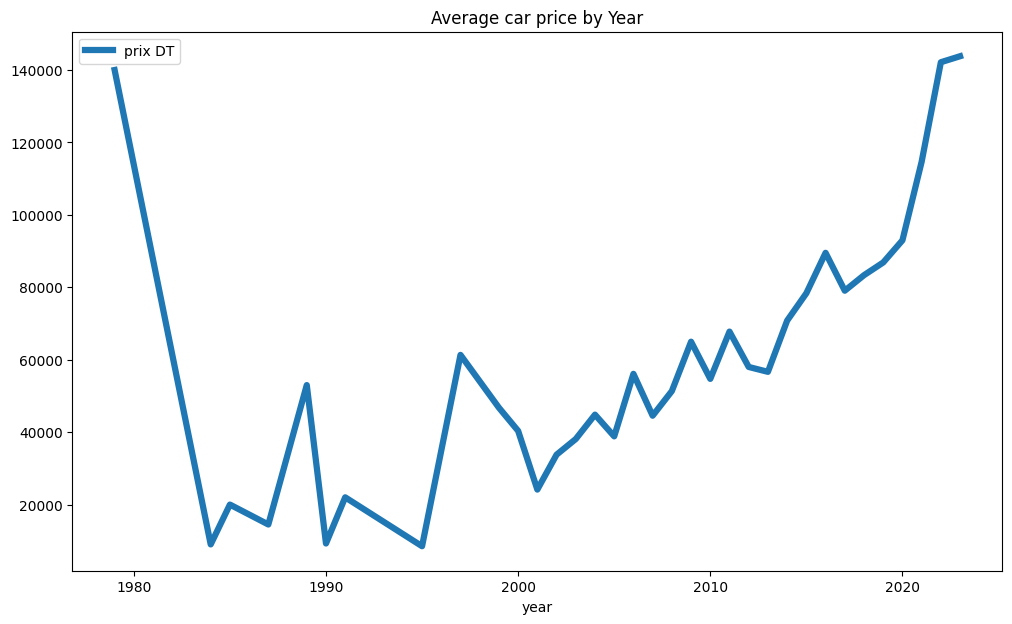

In [ ]:
vis_1=pd.pivot_table(df, index=['year'],values = ['prix DT'],aggfunc = 'mean')
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<Axes: title={'center': 'Average car price by kilometers'}, xlabel='Kms'>

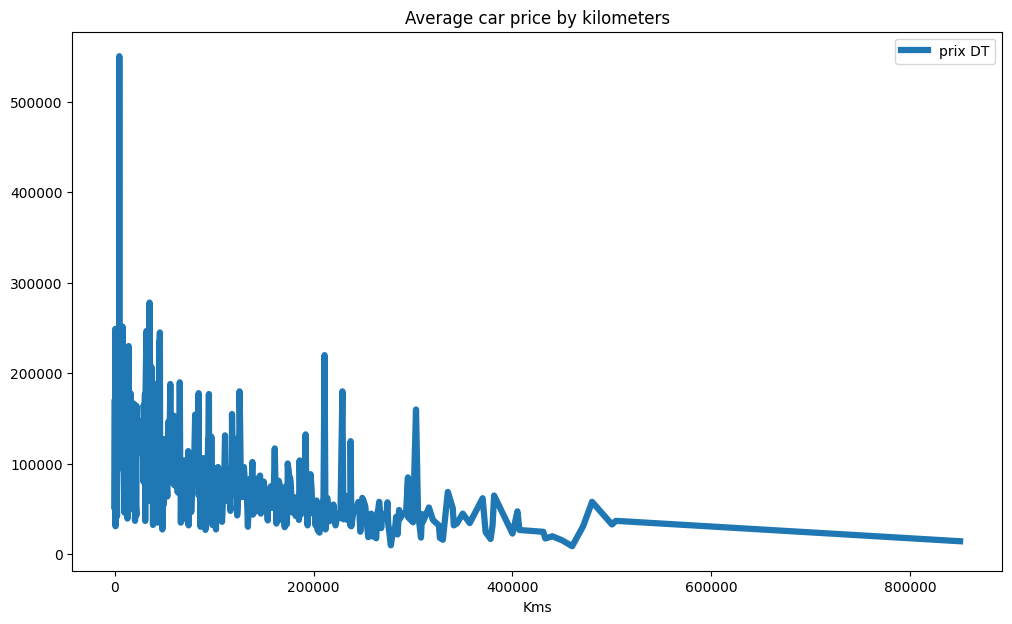

In [ ]:
vis_2=pd.pivot_table(df, index=['Kms'],values = ['prix DT'],aggfunc = 'mean')
vis_2.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by kilometers')

Text(0.5, 1.0, 'Correlation Graph')

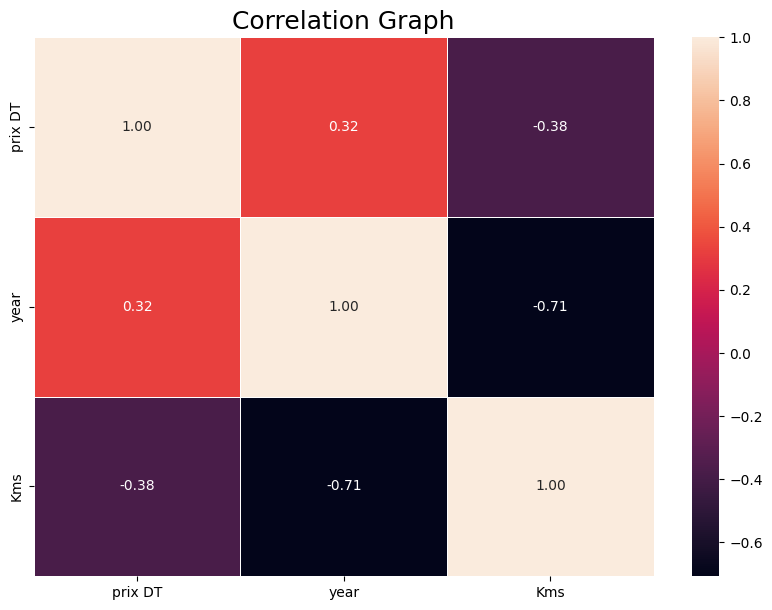

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["prix DT","Car Brand","year","Kms","Energie"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

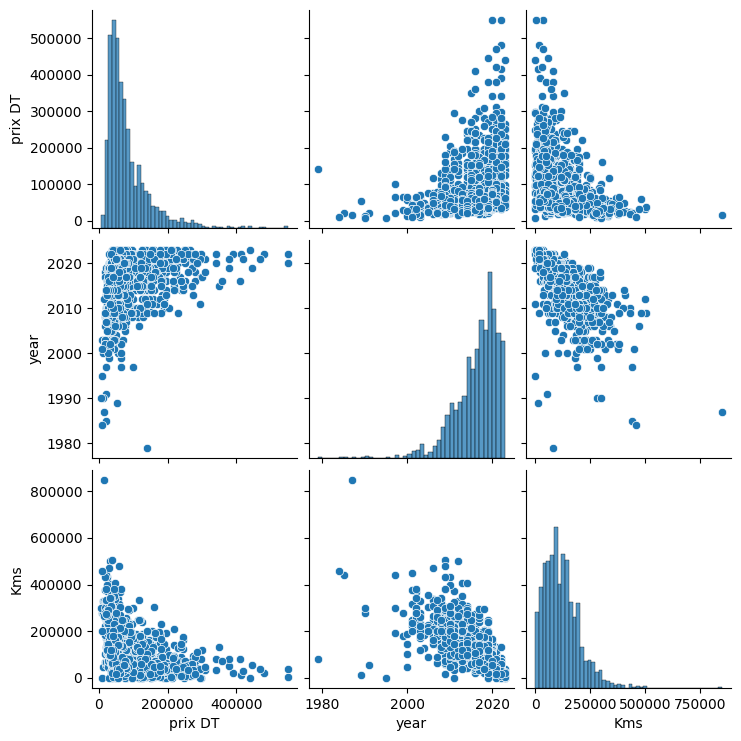

In [ ]:
sns.pairplot(df)

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car Brand  1652 non-null   object
 1   Car Model  1652 non-null   object
 2   prix DT    1652 non-null   int64 
 3   year       1652 non-null   int64 
 4   Kms        1652 non-null   int64 
 5   Energie    1652 non-null   object
 6   gear       1652 non-null   object
dtypes: int64(3), object(4)
memory usage: 90.5+ KB


In [ ]:
# encoding the car's Brand with label encoder
df['Car Brand'] = labelencoder.fit_transform(df['Car Brand'])

df['Car Model'] = labelencoder.fit_transform(df['Car Model'])

df['Energie'] = labelencoder.fit_transform(df['Energie'])

df['gear'] = labelencoder.fit_transform(df['gear'])


In [ ]:
df.head()

,Car Brand,Car Model,prix DT,year,Kms,Energie,gear
0,42,306,80000,2020,17000,1,0
1,42,261,100000,2014,42000,0,0
2,31,90,120000,2014,150000,0,0
3,39,297,121600,2021,96000,1,0
4,31,92,249600,2021,34000,1,0


from matplotlib import pyplot as plt
_df_0['Car Brand'].plot(kind='hist', bins=20, title='Car Brand')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Car Model'].plot(kind='hist', bins=20, title='Car Model')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['prix DT'].plot(kind='hist', bins=20, title='prix DT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Car Brand', y='Car Model', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Car Model', y='prix DT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='prix DT', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='year', y='Kms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['prix DT']
  ys = series['Car Brand']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('prix DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('prix DT')
_ = plt.ylabel('Car Brand')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['prix DT']
  ys = series['Car Model']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('prix DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('prix DT')
_ = plt.ylabel('Car Model')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['prix DT']
  ys = series['Kms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('prix DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('prix DT')
_ = plt.ylabel('Kms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['prix DT']
  ys = series['Energie']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('prix DT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('prix DT')
_ = plt.ylabel('Energie')

from matplotlib import pyplot as plt
_df_12['Car Brand'].plot(kind='line', figsize=(8, 4), title='Car Brand')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Car Model'].plot(kind='line', figsize=(8, 4), title='Car Model')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['prix DT'].plot(kind='line', figsize=(8, 4), title='prix DT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X = df.drop('prix DT', axis=1)
y = df['prix DT']

In [ ]:
X.head(), X.shape

(   Car Brand  Car Model  year     Kms  Energie  gear
 0         42        306  2020   17000        1     0
 1         42        261  2014   42000        0     0
 2         31         90  2014  150000        0     0
 3         39        297  2021   96000        1     0
 4         31         92  2021   34000        1     0,
 (1652, 6))

In [ ]:
y.head(), y.shape

(0     80000
 1    100000
 2    120000
 3    121600
 4    249600
 Name: prix DT, dtype: int64,
 (1652,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1321, 6), (331, 6), (1321,), (331,))

In [ ]:
# train
regr = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)

In [ ]:
predictions = regr.predict(X_test)

Text(0.5, 1.0, 'Prediction and Original data correlation')

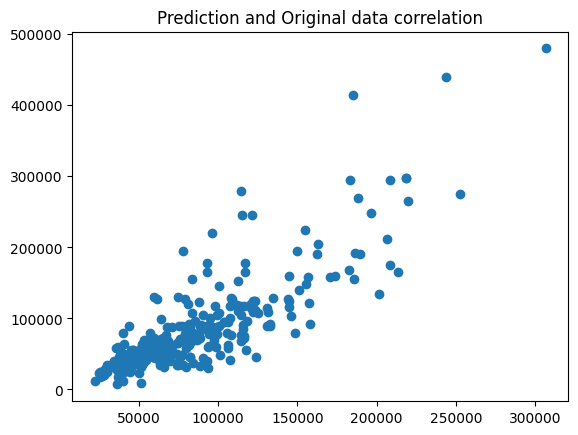

In [ ]:
plt.scatter(predictions,y_test)
plt.title('Prediction and Original data correlation')

In [ ]:
regr.score(X_train, y_train)

0.9459275580351121

In [ ]:
mse = mean_squared_error(y_test.values.ravel(), predictions)
mae = mean_absolute_error(y_test.values.ravel(), predictions)
r2 = r2_score(y_test.values.ravel(), predictions)

In [ ]:
# results
print(f"MSE: {round(mse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"R2 Score: {round(r2, 2)}")

MSE: 1328872763.72
MAE: 21510.29
R2 Score: 0.69


In [ ]:

joblib.dump(labelencoder,'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
joblib.dump(regr,'carPrediction.pkl')

['carPrediction.pkl']

SEARCH GRID

In [ ]:
parameters = {
    'max_depth': [10, 20, 35, 50, 70, 100 ],
    'n_estimators': [100, 500, 1000, 1250, 1500]
}

In [ ]:
gridforest = GridSearchCV(regr, parameters, cv=3, n_jobs=-1)
gridforest.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=15, n_estimators=300,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 35, 50, 70, 100],
                         'n_estimators': [100, 500, 1000, 1250, 1500]})

In [ ]:
gridforest.best_params_

{'max_depth': 20, 'n_estimators': 1000}